In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip3 install xgboost
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [0]:
data=pd.read_csv("/content/drive/My Drive/TF_QA_DATA_SQuAD_FORMAT/TF_QA_features_data.csv")

In [5]:
data.head()

,Unnamed: 0,example_id,target,question,answer,qa_cos_d,qd_cos_d,ad_cos_d,qa_euc_d,qd_euc_d,ad_euc_d,qa_lev_d,qa_lev_r,qa_jar_s,qa_jaw_s,qa_tfidf_score,qd_tfidf_score,ad_tfidf_score,ques_tfidf_sum,txt_tfidf_sum,ans_tfidf_sum,qa_jacc_simi,qd_jacc_simi,ad_jacc_simi
0,0,5655493461695504401,0,which is the most common use of opt-in e-mail ...,A common example of permission marketing is a ...,0.000000,0.240638,0.151459,1.414214,1.232365,1.302721,699,0.122042,0.420911,0.420911,0.000000,0.240638,0.151459,2.44949,25.065582,8.023635,0.028571,0.008249,0.056881
1,1,5655493461695504401,0,which is the most common use of opt-in e-mail ...,A common example of permission marketing is a ...,0.214801,0.240638,0.389560,1.253155,1.232365,1.104934,387,0.188525,0.452384,0.452384,0.214801,0.240638,0.389560,2.44949,25.065582,7.140637,0.042553,0.008249,0.035780
2,2,5655493461695504401,0,which is the most common use of opt-in e-mail ...,A common example of permission marketing is a ...,0.080933,0.240638,0.496867,1.355778,1.232365,1.003129,748,0.112808,0.455547,0.455547,0.080933,0.240638,0.496867,2.44949,25.065582,9.978361,0.046512,0.008249,0.073394
3,3,5655493461695504401,0,which is the most common use of opt-in e-mail ...,A common example of permission marketing is a ...,0.121339,0.240638,0.541389,1.325640,1.232365,0.957717,1009,0.094897,0.428092,0.428092,0.121339,0.240638,0.541389,2.44949,25.065582,11.472659,0.034483,0.008249,0.100917
4,4,5655493461695504401,0,which is the most common use of opt-in e-mail ...,A common example of permission marketing is a ...,0.114208,0.240638,0.373364,1.331009,1.232365,1.119497,588,0.141618,0.476906,0.476906,0.114208,0.240638,0.373364,2.44949,25.065582,9.231798,0.050000,0.008249,0.067890


In [6]:
data.columns

Index(['Unnamed: 0', 'example_id', 'target', 'question', 'answer', 'qa_cos_d',
       'qd_cos_d', 'ad_cos_d', 'qa_euc_d', 'qd_euc_d', 'ad_euc_d', 'qa_lev_d',
       'qa_lev_r', 'qa_jar_s', 'qa_jaw_s', 'qa_tfidf_score', 'qd_tfidf_score',
       'ad_tfidf_score', 'ques_tfidf_sum', 'txt_tfidf_sum', 'ans_tfidf_sum',
       'qa_jacc_simi', 'qd_jacc_simi', 'ad_jacc_simi'],
      dtype='object')

In [0]:
X=data.drop(labels=['Unnamed: 0', 'example_id', 'target','question', 'answer'],axis=1)

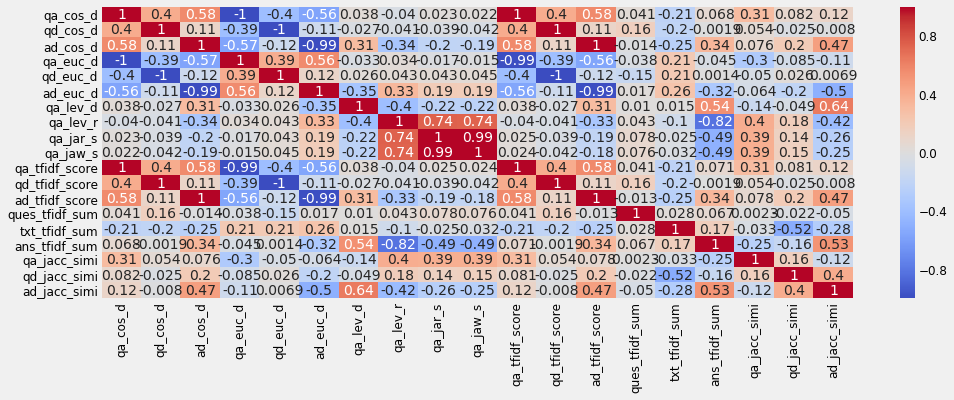

In [8]:
data_corr=X.corr()
corr=data_corr
plt.figure(figsize=(15,5))
sns.heatmap(corr, vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

In [9]:
data.fillna(0.0,inplace=True)
data_columns=X.columns
data_columns

Index(['qa_cos_d', 'qd_cos_d', 'ad_cos_d', 'qa_euc_d', 'qd_euc_d', 'ad_euc_d',
       'qa_lev_d', 'qa_lev_r', 'qa_jar_s', 'qa_jaw_s', 'qa_tfidf_score',
       'qd_tfidf_score', 'ad_tfidf_score', 'ques_tfidf_sum', 'txt_tfidf_sum',
       'ans_tfidf_sum', 'qa_jacc_simi', 'qd_jacc_simi', 'ad_jacc_simi'],
      dtype='object')

In [0]:
col=np.full((corr.shape[0],),True, dtype=bool)
for i in range(0,corr.shape[0]):
  for j in range(i+1,corr.shape[0]):
    if corr.iloc[i,j]>=0.9:
      if col[j]:
        col[j]=False

selected_columns=data_columns[col]

In [0]:
selected_columns=selected_columns.values.tolist()

In [0]:
models=list()
models.append(("Decision Trees",DecisionTreeClassifier(random_state=0)))
models.append(("Naive Bayes",MultinomialNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG-Boost",XGBClassifier()))

In [19]:
x=np.array(data[selected_columns].values.tolist())
y=np.array(data['target'].values.tolist())
for idx in models:
  clf_name,clf_obj=idx[0],idx[1]
  prec=list()
  rec=list()
  acc=list()
  print("Classifier Name = {}".format(clf_name))
  skf = StratifiedKFold(n_splits=5)
  i=0
  for train_index, test_index in skf.split(x,y):
    print ("  K-Fold = {}".format(i+1))
    i=i+1
    x_train,y_train=x[train_index],y[train_index]
    x_test,y_test=x[test_index],y[test_index]
    clf_obj.fit(x_train,y_train)
    pred=clf_obj.predict(x_test)
    accuracy=round(accuracy_score(y_test,pred)*100,2)
    recall=round(recall_score(y_test,pred,average="weighted")*100,2)
    precision=round(precision_score(y_test,pred,average="weighted")*100,2)
    prec.append(precision)
    rec.append(recall)
    acc.append(accuracy)
    print ("\tAccuracy = {}% , Precision = {}% , Recall = {}%".format(accuracy,precision,recall))
  print ("Mean-Accuracy = {}% , Mean-Precision = {}% , Mean-Recall = {}%".format(round(np.mean(acc),2),round(np.mean(prec),2),round(np.mean(rec),2)))
  del prec
  del acc
  del rec
print ("Done")

Classifier Name = Decision Trees
  K-Fold = 1
	Accuracy = 93.6% , Precision = 97.57% , Recall = 93.6%
  K-Fold = 2
	Accuracy = 96.84% , Precision = 97.63% , Recall = 96.84%
  K-Fold = 3
	Accuracy = 97.09% , Precision = 97.53% , Recall = 97.09%
  K-Fold = 4
	Accuracy = 96.61% , Precision = 97.47% , Recall = 96.61%
  K-Fold = 5
	Accuracy = 97.24% , Precision = 97.49% , Recall = 97.24%
Mean-Accuracy = 96.28% , Mean-Precision = 97.54% , Mean-Recall = 96.28%
Classifier Name = Naive Bayes
  K-Fold = 1
	Accuracy = 84.62% , Precision = 97.67% , Recall = 84.62%
  K-Fold = 2
	Accuracy = 89.49% , Precision = 97.56% , Recall = 89.49%
  K-Fold = 3
	Accuracy = 88.09% , Precision = 97.6% , Recall = 88.09%
  K-Fold = 4
	Accuracy = 85.64% , Precision = 97.65% , Recall = 85.64%
  K-Fold = 5
	Accuracy = 84.38% , Precision = 97.69% , Recall = 84.38%
Mean-Accuracy = 86.44% , Mean-Precision = 97.63% , Mean-Recall = 86.44%
Classifier Name = Logistic Regression
  K-Fold = 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


	Accuracy = 98.67% , Precision = 97.87% , Recall = 98.67%
  K-Fold = 2
	Accuracy = 98.7% , Precision = 97.42% , Recall = 98.7%
  K-Fold = 3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


	Accuracy = 98.67% , Precision = 97.41% , Recall = 98.67%
  K-Fold = 4
	Accuracy = 98.7% , Precision = 97.41% , Recall = 98.7%
  K-Fold = 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	Accuracy = 98.72% , Precision = 97.46% , Recall = 98.72%
Mean-Accuracy = 98.69% , Mean-Precision = 97.51% , Mean-Recall = 98.69%
Classifier Name = XG-Boost
  K-Fold = 1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	Accuracy = 98.7% , Precision = 97.42% , Recall = 98.7%
  K-Fold = 2
	Accuracy = 98.67% , Precision = 97.42% , Recall = 98.67%
  K-Fold = 3
	Accuracy = 98.67% , Precision = 97.41% , Recall = 98.67%
  K-Fold = 4
	Accuracy = 98.7% , Precision = 97.41% , Recall = 98.7%
  K-Fold = 5
	Accuracy = 98.72% , Precision = 97.46% , Recall = 98.72%
Mean-Accuracy = 98.69% , Mean-Precision = 97.42% , Mean-Recall = 98.69%
Done


In [0]:
def plot_confusion_matrix(y_test,pred):
  
  cf_matrix=confusion_matrix(y_test,pred)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

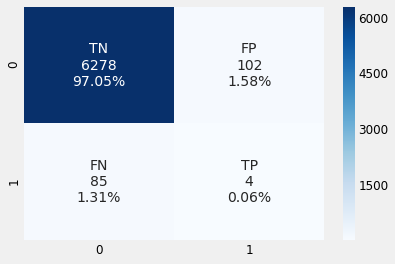

In [0]:
plot_confusion_matrix(y_test,pred)

In [0]:
names = ['FNN', 'TLNN', 'SANN', 'LSTM']
RMSE_values = [117.976000, 125.474000, 139.222000, 92.758000]
RMSE_info = pd.Series(RMSE_values, index=names)

In [0]:
ax = RMSE_info.plot(kind='bar', figsize=(10,5), rot=0, title='RMSE scores')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')